In [ ]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 90%;
}
</style>

# Interactive Data Viz with Jupyter

#### ➡️  _Download a notebook  & follow along here: BITLY LINK_

<p >
<img src='https://github.com/jessimk/torontomap/raw/master/figures/interactive_map_in_action.gif?raw=true' width=600 style="padding: 0 15px; float: left,"/>
</p>
<p>👋 Jes Simkin
<br> 
<br> 
<img src='https://emojis.slackmojis.com/emojis/images/1450822151/257/github.png?1450822151' width=35 align='left'/> &nbsp;&nbsp; @jessimk  
<br>
<br> 
<img src='https://emojis.slackmojis.com/emojis/images/1450733056/231/twitter.png?1450733056' width=35 align='left'/> &nbsp;&nbsp; @ _jes5
</p>


# 🤞 What I hope you'll leave today with:

- Using Jupyter to begin exploring data visually
- Intro to interactive plotting with various libraries in Jupyter & Python
- Appreciation for geospatial context & layers of data
- Code to get you started with interactive data viz in Jupyter!

# 📌 Agenda 

- Building motivation
    - Static maps with matplotlib and Seaborn  
    
- Thinking about layers & design
    - Interactive maps with Plotly Express ✨ 
    
- Adding geospatial context
    - Making maps with Folium (Python + Leaflet.js)

In [13]:
# Loading packages

#!pip install pandas
import pandas as pd
#!pip install geopandas
import geopandas as gpd

#!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install seaborn
import seaborn as sns
#!pip install plotly_express
import plotly.express as px

#!pip install folium
import folium
from folium.plugins import MarkerCluster, FeatureGroupSubGroup, HeatMap

## Bikeshare Data: 
### Citi Bike, NYC 🗽🚲 
- Source: https://www.citibikenyc.com/system-data
- Subset of the data
- Trip departures (where do trips start?)

In [4]:
nybikes = pd.read_csv('citibikedepartures0719.csv')

nybikes.sample(5)

Unnamed: 0  tripduration                starttime  \
1162491     1162491          1175  2019-07-17 11:27:17.088   
597529       597529           346  2019-07-09 20:34:23.710   
1853689     1853689          1915  2019-07-27 15:20:38.475   
486383       486383          1262  2019-07-08 16:30:42.297   
1868891     1868891           615  2019-07-27 18:09:17.199   

                         stoptime  start_station_id       start_station_name  \
1162491  2019-07-17 11:46:52.8840             481.0     S 3 St & Bedford Ave   
597529   2019-07-09 20:40:10.6030             483.0          E 12 St & 3 Ave   
1853689  2019-07-27 15:52:33.8560            3337.0  Dwight St & Van Dyke St   
486383   2019-07-08 16:51:44.4040             426.0    West St & Chambers St   
1868891  2019-07-27 18:19:32.9980             324.0  DeKalb Ave & Hudson Ave   

         start_station_latitude  start_station_longitude  bikeid    usertype  \
1162491               40.712605               -73.962644   33019  Subscriber   
597529                40.732233               -73.988900   17768  Subscriber   
1853689               40.673636               -74.011956   18338  Subscriber   
486383                40.717548               -74.013221   34305    Customer   
1868891               40.689888               -73.981013   30218  Subscriber   

         dept_hour  weekday   start_ymd  
1162491         11        2  2019-07-17  
597529          20        1  2019-07-09  
1853689         15        5  2019-07-27  
486383          16        0  2019-07-08  
1868891         18        5  2019-07-27

In [9]:
#subsetting the massive dataset
departures = nybikes.sample(1500)

# plotting bus stop data
plt.scatter(departures.start_station_longitude, departures.start_station_latitude, s=5)

#does this look right?

https://member.citibikenyc.com/map/

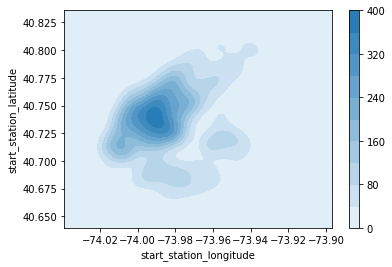

In [11]:
sns.kdeplot(departures.start_station_longitude, departures.start_station_latitude, cbar=True, shade=True)

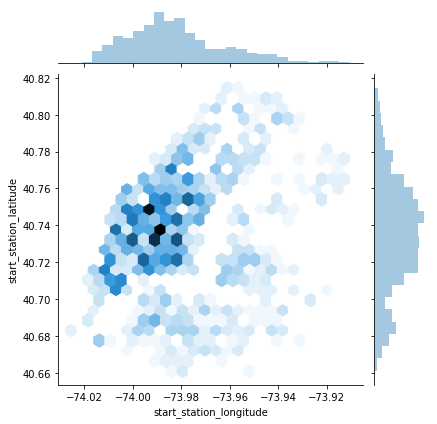

In [12]:
sns.jointplot(departures.start_station_longitude, departures.start_station_latitude, kind="hex")

Static images give us a very high-level view of the data. 

... 🔍 Can we get more context?

## Adding interactive context with Plotly Express

New!  

Introduced in March 2019

Source: https://medium.com/plotly/introducing-plotly-express-808df010143d

"_Inspired by Seaborn and ggplot2, it was specifically designed to have a terse, consistent and easy-to-learn API: with just a single import, you can make richly interactive plots in just a single function call, including faceting, maps, animations, and trendlines._"

## Pros
- quick
- relatively intuitive (ggplot2) compared to other plotlys
- easy to add zoom, hover, pan, save img, animations!


## Cons
- quick
- pretty limited functionality and customization


General structure of the plotly express plotting functions:

- dataframe
- data: x,y
- aesthetics: color, size, symbol
- facetting by groups
- interactive text


and more...
    

In [14]:
fig = px.scatter(departures, 
                 x="start_station_longitude", 
                 y="start_station_latitude", 
                 hover_name="start_station_name")
fig.show()

In [15]:
fig = px.scatter(departures, 
                 x="start_station_longitude", 
                 y="start_station_latitude", 
                 hover_name="start_station_name",
                facet_col='usertype')
fig.show()

In [16]:
a_bike = nybikes.query("bikeid == 33952").sort_values(by=['starttime'])
a_bike['starttime'] = a_bike['starttime'].astype(str)

fig = px.scatter(a_bike, 
                 x="start_station_longitude", 
                 y="start_station_latitude", 
                 hover_name="start_station_name",
                animation_frame='starttime')
fig.show()

## Folium

Combines python and leaflet.js an amazing javascript library.


## Pros
- map tiles! context!
- useful tools to avoid overplotting with marker clusters
- a lot one can customize (with time investment)

## Cons
- learning curve + time
- might need to export to html for large data sets


In [18]:
#making a geopandas df
departures = gpd.GeoDataFrame(
    departures, geometry=gpd.points_from_xy(departures.start_station_longitude, departures.start_station_latitude))

In [19]:
departures.head()

Unnamed: 0  tripduration                starttime  \
1916235     1916235           449  2019-07-28 14:11:00.563   
2123444     2123444          1507  2019-07-31 07:47:23.916   
1049937     1049937           536  2019-07-15 22:35:12.327   
970802       970802           333  2019-07-15 00:05:51.060   
1930101     1930101           599  2019-07-28 16:46:29.275   

                         stoptime  start_station_id  \
1916235  2019-07-28 14:18:29.9400             388.0   
2123444  2019-07-31 08:12:31.0380             313.0   
1049937  2019-07-15 22:44:08.5840             243.0   
970802   2019-07-15 00:11:24.8130            3170.0   
1930101  2019-07-28 16:56:28.3420             426.0   

                start_station_name  start_station_latitude  \
1916235           W 26 St & 10 Ave               40.749718   
2123444  Washington Ave & Park Ave               40.696102   
1049937    Fulton St & Rockwell Pl               40.688410   
970802      W 84 St & Columbus Ave               40.785000   
1930101      West St & Chambers St               40.717548   

         start_station_longitude  bikeid    usertype  dept_hour  weekday  \
1916235               -74.002950   39947  Subscriber         14        6   
2123444               -73.967510   18854  Subscriber          7        2   
1049937               -73.979458   39625  Subscriber         22        0   
970802                -73.972834   30683  Subscriber          0        0   
1930101               -74.013221   39875    Customer         16        6   

          start_ymd                                 geometry  
1916235  2019-07-28  POINT (-74.00295034600001 40.749717753)  
2123444  2019-07-31         POINT (-73.96751037 40.69610226)  
1049937  2019-07-15      POINT (-73.97945799999999 40.68841)  
970802   2019-07-15         POINT (-73.97283406 40.78499979)  
1930101  2019-07-28         POINT (-74.01322069 40.71754834)

In [26]:
#initializing base map
m = folium.Map(location=[40.74, -73.98], zoom_start=13)
m

In [27]:
#initializing base map
m = folium.Map(location=[40.74, -73.98], zoom_start=13)


#adding markers per group
for trip in departures.sample(800).iterrows():
    
        coord = (round(trip[1].geometry.y,4),
                round(trip[1].geometry.x,4))
        
        stn_name = trip[1]['start_station_name']

        folium.Marker(coord,
                      popup= stn_name+'<br/><br/>'+'cool!').add_to(m)
        
m

Uh oh! Overplotting :(

Adding MarkerClusters

In [23]:
#initializing base map
m = folium.Map(location=[40.74, -73.98], zoom_start=13)

#adding a tile layer
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)

#adding marker cluster plugin to map
mc = MarkerCluster(name='Base Layer', control=False)
m.add_child(mc)

#creating subgroups for markers so they can be toggled on/off.
biketrips = FeatureGroupSubGroup(mc, 'Citi Bike Trips, Start Locations', show=True)
m.add_child(biketrips)

#adding markers per group
for trip in departures.sample(800).iterrows():
    
        coord = (round(trip[1].geometry.y,4),
                round(trip[1].geometry.x,4))
        
        stn_name = trip[1]['start_station_name']

        folium.Marker(coord,
                      popup= stn_name+'<br/><br/>'+'cool!').add_to(biketrips)

folium.LayerControl().add_to(m)

In [24]:
m

## Summary

- Using Jupyter to begin exploring data visually
- Intro to interactive plotting with various libraries in Jupyter & Python
- Appreciation for geospatial context & layers of data
- Code to get you started with interactive data viz in Jupyter!

## Further Readings